In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from matplotlib.colors import LogNorm
from glob import glob
import pandas as pd

In [2]:
EISCAT_path = '../../DataSorted/2004-03-31*/MAD*.hdf5'
if len(glob(EISCAT_path)) != 0:
    EISCAT_file = glob(EISCAT_path)[0]
else:
    print('No EISCAT data file found.')

No EISCAT data file found.


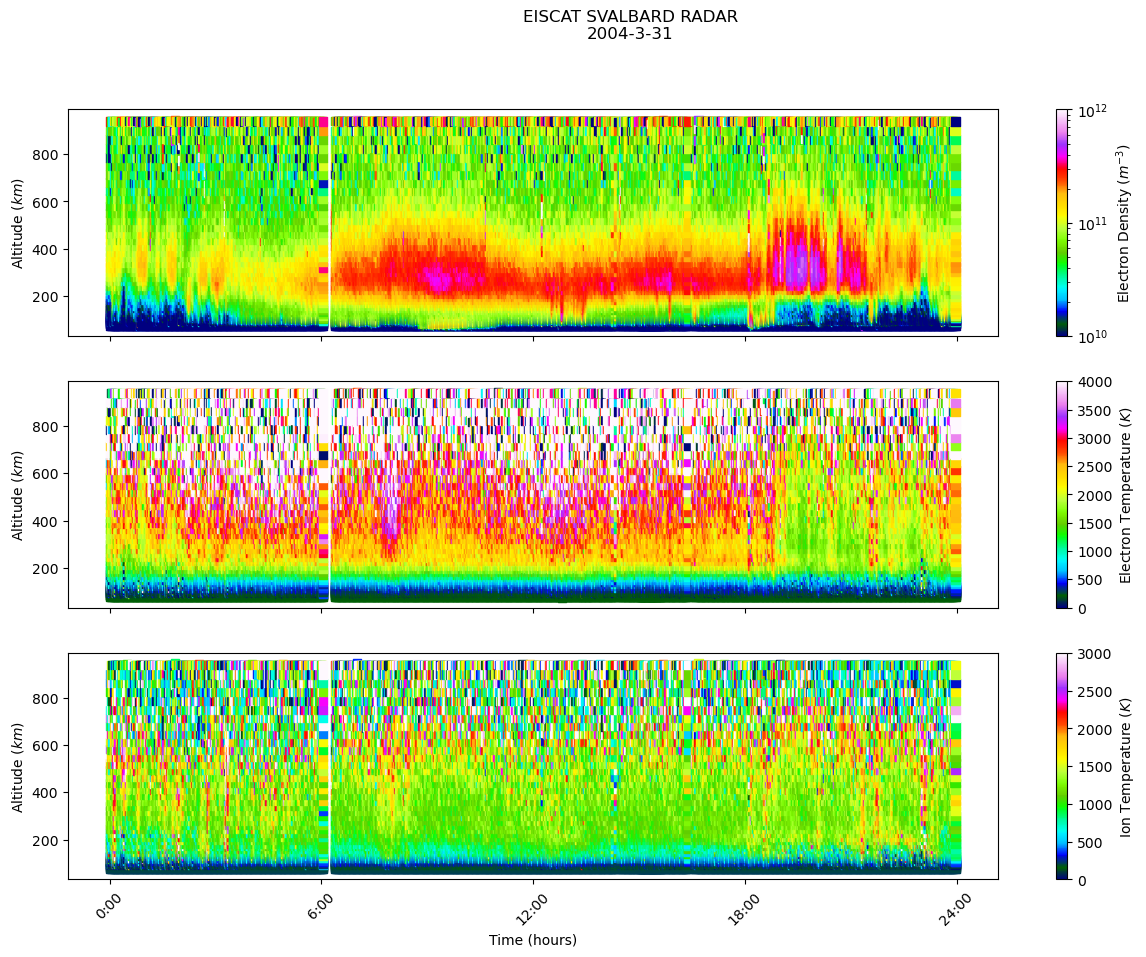

In [20]:
with h5py.File(EISCAT_file, 'r') as f: 
    data = f['Data']['Table Layout'][:] # Get data from the file
    metadata = f['Metadata']['Data Parameters'][:] # Get data parameters from the file
    parameters = [parameter[0] for parameter in metadata] # Get the name of each parameters

    data = np.array([np.array(tuple.tolist()) for tuple in data])
    dataframe = pd.DataFrame(data, columns=parameters)
    h = np.array(dataframe[b'GDALT']) # Altitude m
    Ne = np.array(dataframe[b'NE']) # Electron density m-3
    Ti = np.array(dataframe[b"TI"]) # Ion temperature K
    Tr = np.array(dataframe[b'TR']) # Electron to ion temperature ratio
    hours = np.array(dataframe[b'HOUR']) # Hours
    minutes = np.array(dataframe[b'MIN']) # Minutes

    Date = str(int(dataframe[b'YEAR'][0])) + '-' + str(int(dataframe[b'MONTH'][0])) + '-' + str(int(dataframe[b'DAY'][0]))
    Te = Ti * Tr
    time = hours + minutes/60

    fig, axs = plt.subplots(3, sharex=True, sharey=True,figsize=(15, 10))
    fig.suptitle('EISCAT SVALBARD RADAR' + '\n' + str(Date))

    sc = axs[0].scatter(time, h, c = Ne, cmap='gist_ncar', norm=LogNorm(vmin=10e9, vmax=10e11),marker = 's')
    cbar = fig.colorbar(sc, ax=axs[0])
    cbar.set_label(r'Electron Density ($m^{-3}$)')

    sc = axs[1].scatter(time, h, c = Te, cmap='gist_ncar',marker = 's', vmin=0, vmax=4000)
    cbar = fig.colorbar(sc, ax=axs[1])
    cbar.set_label(r'Electron Temperature ($K$)')

    sc = axs[2].scatter(time, h, c = Ti, cmap='gist_ncar',marker = 's', vmin=0, vmax=3000)
    cbar = fig.colorbar(sc, ax=axs[2])
    cbar.set_label(r'Ion Temperature ($K$)')

    for ax in axs:
        ax.set_ylabel(r'Altitude ($km$)')
    axs[-1].set_xlabel('Time (hours)')
    axs[-1].set_xticks([0,6,12,18,24])
    axs[-1].set_xticklabels(['0:00','6:00','12:00','18:00','24:00'], rotation=45)

    plt.show()